In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
# TODO: Ideálně upravit na výpočet LUFS

In [2]:
def Moovin_average_of_RMS(uploaded_file_name):   
    y, sr = librosa.load(uploaded_file_name)

    # STFT
    S, phase = librosa.magphase(librosa.stft(y))

    # rms calculation
    rms = librosa.feature.rms(S=S)
    seconds = 7.5

    # mooving averages calculation
    order = (sr/2048)*seconds
    order = round(order)

    rms_ma = np.zeros((1,(rms.size)))
    for n in range(rms.size-order):
        for m in range(order):
            rms_ma[0,n] = rms_ma[0,n] + rms[0,(n+m)]
        if rms_ma[0,n] != 0:
            rms_ma[0,n] = rms_ma[0,n]/order
    return rms, rms_ma, S

In [3]:
def Print_graphs(rms,rms_ma,S):
    fig, ax = plt.subplots(3,1, figsize=(10,6))
    fig.tight_layout()
    fig.subplots_adjust(hspace = 0.65 )

    times = librosa.times_like(rms)

    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[0])
    ax[0].set(title='a) Spektrogram')
    ax[0].set_ylabel("frekvence [Hz]")


    ax[1].plot(times, rms[0])
    ax[1].set_xlabel("čas [s]")
    ax[1].set_ylabel("RMS")
    ax[1].set_title("b) Efektivní hodnota")
    ax[1].set_xlim(xmin=0, xmax=times[len(times)-1])

    ax[2].plot(times, rms_ma[0])
    ax[2].set_xlabel("čas [s]")
    ax[2].set_ylabel("RMS")
    ax[2].set_title('c) Klouzavý průměr efektivní hodnoty')
    ax[2].set_xlim(xmin=0, xmax=times[len(times)-1])

    fig.savefig('Belly_dancer_RMS.eps', format='eps', bbox_inches='tight')



In [4]:
def Rms_analyse(uploaded_file_name):
    rms, rms_ma, S = Moovin_average_of_RMS(uploaded_file_name=uploaded_file_name)
    Print_graphs(rms=rms, rms_ma=rms_ma, S=S)

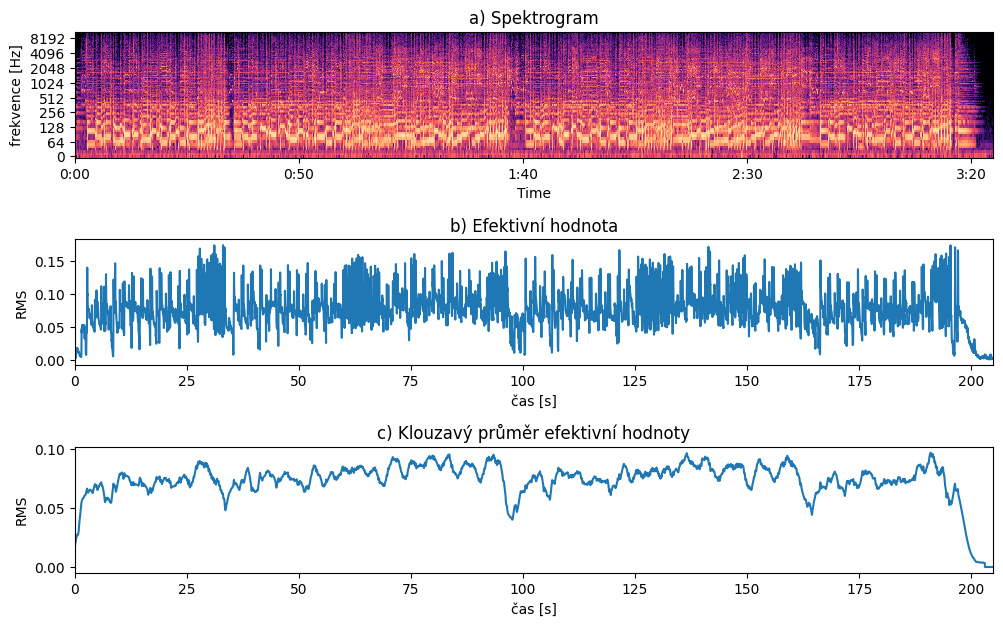

In [5]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/04.-Oh! Darling.wav"
Rms_analyse(uploaded_file_name)

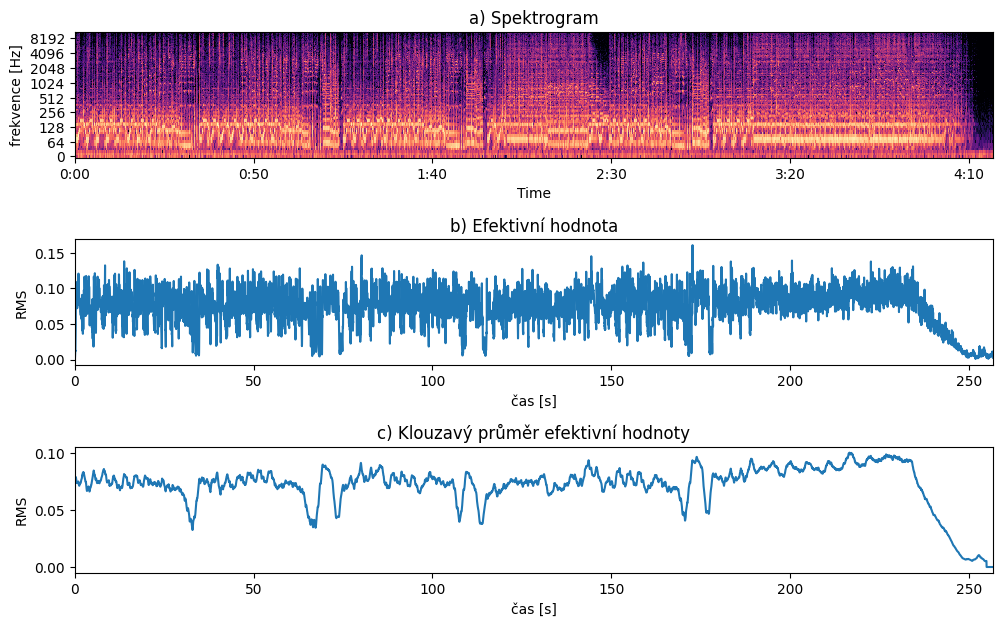

In [6]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/01.-Come Together.wav"
Rms_analyse(uploaded_file_name)

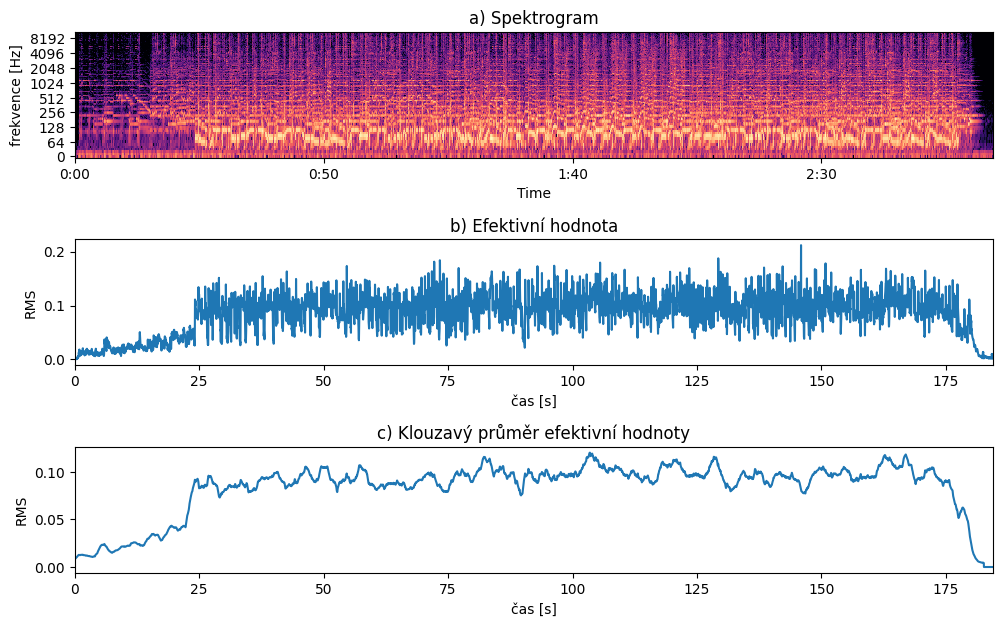

In [7]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/07.-Here Comes The Sun.wav"
Rms_analyse(uploaded_file_name)

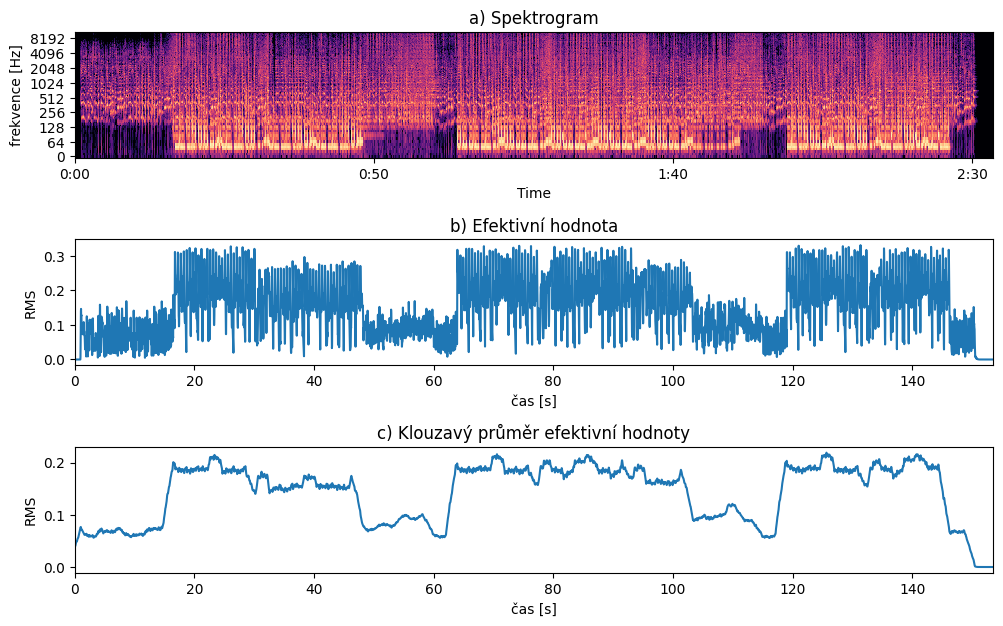

In [8]:
uploaded_file_name = "Referencni_skladby/Imanbek & BYOR - Belly Dancer (Official Music Video).wav"
Rms_analyse(uploaded_file_name)